In [20]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [21]:
#0. prepare data

In [22]:
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise=20, random_state=1)

In [23]:
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))

In [24]:
y=y.view(y.shape[0],1)

In [25]:
X.shape

torch.Size([100, 1])

In [26]:
n_samples, n_features = X.shape

In [27]:
#1. Design Model

In [28]:
input_size = n_features
output_size=1

In [29]:
model = nn.Linear(input_size, output_size)

In [30]:
#2. Define loss and optimizer

In [31]:
learning_rate=0.01

In [32]:
criterion = nn.MSELoss()

In [33]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [34]:
#3. training loop

In [35]:
num_epoch = 100

epoch: 10, loss=332.5682
epoch: 20, loss=332.5681
epoch: 30, loss=332.5679
epoch: 40, loss=332.5678
epoch: 50, loss=332.5678
epoch: 60, loss=332.5677
epoch: 70, loss=332.5677
epoch: 80, loss=332.5676
epoch: 90, loss=332.5676
epoch: 100, loss=332.5676


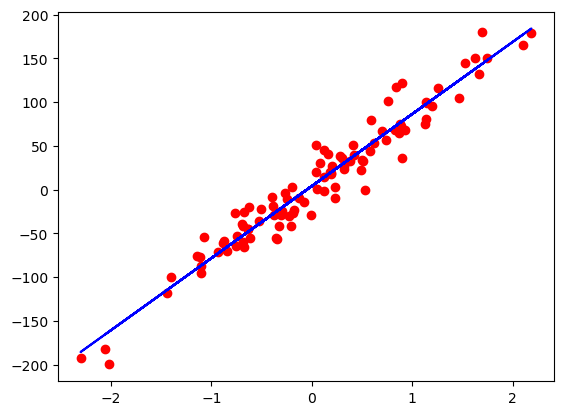

In [41]:
for epoch in range(num_epoch):
    #forward pass ad loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    #backward pass
    loss.backward()
    #update
    optimizer.step()
    optimizer.zero_grad()
    
    if((epoch+1)%10 == 0):
        print(f'epoch: {epoch+1}, loss={loss.item():.4f}')
        
#plots
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()